#**K-Means Algorithm from Scratch**

In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler

In [2]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)
def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost

In [3]:
def plot_k_means(X, K, max_iter=20, beta=3.0, show_plots=False):
    N, D = X.shape
    exponents = np.empty((N, K))
    initial_centers = np.random.choice(N, K, replace=False)
    M = X[initial_centers]
    costs = []
    k = 0
    for i in range(max_iter):
        k += 1
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
        R = exponents / exponents.sum(axis=1, keepdims=True)

        # full vectorization
        M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
        c = cost(X, R, M)
        costs.append(c)
        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 1e-5:
                break
        if len(costs) > 1:
            if costs[-1] > costs[-2]:
                pass
    print("COST", costs[-1])
    if show_plots:
        plt.plot(costs)
        plt.title("Costs")
        plt.show()
        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.show()
    print("-----------------------------------------------------")
    return M, R

In [4]:
def get_simple_data():
    D = 2 
    s = 4 
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])
    N = 900 
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3
    return X

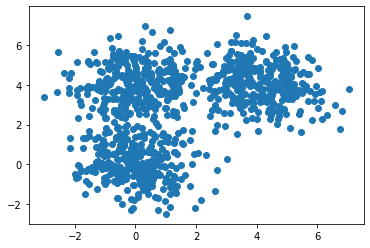

In [8]:
X = get_simple_data()
plt.scatter(X[:,0], X[:,1])
plt.show()

COST 1737.3466738090788


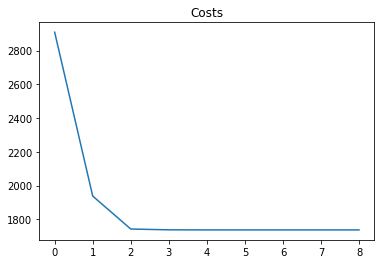

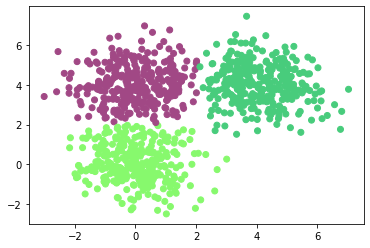

-----------------------------------------------------


(array([[ 1.12330064e-02,  4.09498021e+00],
        [ 4.10679813e+00,  4.05883419e+00],
        [-1.09918763e-02,  4.66448010e-04]]),
 array([[7.44898042e-006, 5.03469373e-077, 9.99992551e-001],
        [2.31574536e-044, 3.45704824e-118, 1.00000000e+000],
        [3.71732485e-059, 2.01431355e-125, 1.00000000e+000],
        ...,
        [1.00000000e+000, 7.72886684e-023, 5.45018514e-062],
        [1.00000000e+000, 9.22257471e-082, 2.51949854e-019],
        [1.00000000e+000, 3.95064577e-095, 1.00074564e-087]]))

In [9]:
K = 3 
plot_k_means(X, K, beta=10.0, show_plots=True)

COST 1283.5824645266287


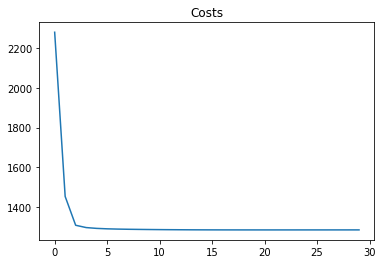

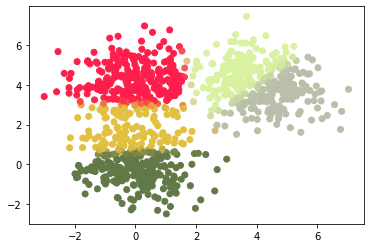

-----------------------------------------------------


(array([[ 0.03162995, -0.46814135],
        [-0.03301057,  4.35057431],
        [ 4.7228034 ,  3.44004786],
        [ 3.43772072,  4.65140864],
        [-0.09988714,  1.74849243]]),
 array([[5.42204127e-08, 1.73741645e-08, 2.60503178e-32, 1.41856321e-25,
         9.99999928e-01],
        [8.41952569e-02, 7.17491659e-16, 3.64642685e-38, 1.43713650e-34,
         9.15804743e-01],
        [9.65529465e-01, 4.39323191e-20, 8.47064368e-39, 3.21052251e-37,
         3.44705347e-02],
        ...,
        [2.41933507e-23, 9.99008341e-01, 1.10518790e-11, 9.83336190e-04,
         8.32319089e-06],
        [5.94745958e-12, 5.25845020e-04, 8.79802072e-33, 5.03213688e-23,
         9.99474155e-01],
        [6.60231360e-33, 1.00000000e+00, 1.58688350e-38, 1.75591441e-21,
         2.00065583e-10]]))

In [10]:
K = 5 
plot_k_means(X, K, max_iter=30, show_plots=True)

COST 2090.155829011056


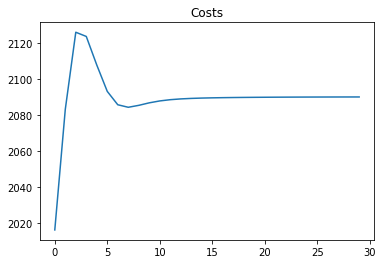

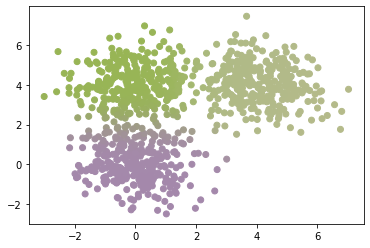

-----------------------------------------------------


(array([[-0.01334041,  0.03880712],
        [ 3.89288078,  4.07275104],
        [-0.01392379,  3.99021245],
        [-0.01393931,  3.99016206],
        [ 3.9410938 ,  4.05694104],
        [ 3.94792664,  4.05456011],
        [-0.01322584,  0.03840787]]),
 array([[2.81018374e-01, 2.27494338e-03, 2.15880515e-01, ...,
         2.05548281e-03, 2.02615959e-03, 2.80846161e-01],
        [4.71880045e-01, 2.28279750e-04, 2.78592313e-02, ...,
         2.08045895e-04, 2.05353076e-04, 4.71756275e-01],
        [4.89085533e-01, 1.40540897e-04, 1.07401543e-02, ...,
         1.29506898e-04, 1.28037354e-04, 4.89034559e-01],
        ...,
        [5.47927158e-03, 1.04924961e-01, 3.45370747e-01, ...,
         9.72227812e-02, 9.61616636e-02, 5.47326695e-03],
        [1.04628183e-01, 2.26409486e-03, 3.92275883e-01, ...,
         2.01384771e-03, 1.98055494e-03, 1.04538199e-01],
        [1.38003746e-03, 1.36317859e-03, 4.96780241e-01, ...,
         1.17475583e-03, 1.14991571e-03, 1.37792407e-03]]))

In [11]:
K = 7
plot_k_means(X, K, max_iter=30, beta=0.3, show_plots=True)

#**Neural K-Means**

In [14]:
#Normalize
X = get_simple_data()
scaler = StandardScaler()
X = scaler.fit_transform(X)
N, D = X.shape
K = 3
W = np.random.randn(D, K)

#set hyperparameters
n_epochs = 100
learning_rate = 0.001
losses = []

# training loop
for i in range(n_epochs):
  loss = 0
  for j in range(N):
    h = W.T.dot(X[j])
    k = np.argmax(h)
    #accumulate loss
    loss += (W[:,k] - X[j]).dot(W[:,k] - X[j])
    #weight update
    W[:,k] += learning_rate * (X[j] - W[:,k])
  losses.append(loss)

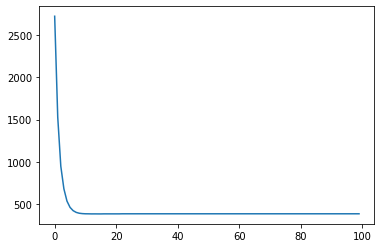

In [15]:
# plot losses
plt.plot(losses)
plt.show()

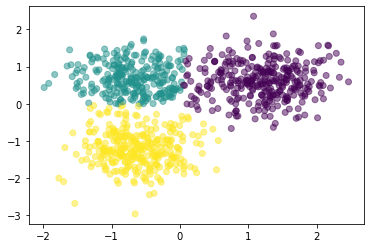

In [18]:
# show cluster assignments
H = np.argmax(X.dot(W), axis=1)
plt.scatter(X[:,0], X[:,1], c=H, alpha=0.5)
plt.show()